In [1]:
# Whole Connectome Analysis (Time Constants)

import numpy as np
import pickle
import os

# get the original states from pkl files
# original_states_dir = './data/whole_connectome_states/original_embeddings'
# originalStates = []

# for file in os.listdir(original_states_dir):
#     with open(os.path.join(original_states_dir, file), 'rb') as f:
#         originalStates.append(pickle.load(f))


# # get the shifted states
# shifted_states_dir = './data/whole_connectome_states/shifted_embeddings'
# shiftedStates = []

# for file in os.listdir(shifted_states_dir):
#     with open(os.path.join(shifted_states_dir, file), 'rb') as f:
#         shiftedStates.append(pickle.load(f))

originalStates = pickle.load(open('./data/whole_connectome_states/original_embeddings/sherlock_transcript_embeddings.npy.pkl', 'rb'))
shiftedStates = pickle.load(open('./data/whole_connectome_states/shifted_embeddings/sherlock_transcript.npy.pkl', 'rb'))


# now we have the original and shifted states for 7 RSNs, each with 10 alpha values

In [110]:
# now get the time constants for each RSN and alpha value
import resUtils as rutils
from tqdm import tqdm

networks = rutils.networks_all
alphas = np.linspace(0, 2, 11)[1:]
densities = rutils.nonzero_densities
normalize_by_density = True

all_data = []
# each story has a different point of shift, so we need to find that (should be 20% and 60%)
# for each story, find the point of shift
window_size = 100
timeconstants = {networks: {alphas: [] for alphas in alphas} for networks in networks}
for i, network in tqdm(enumerate(networks)):
    for j, alpha in enumerate(alphas):
        original = originalStates[network][alpha]
        shifted = shiftedStates[network][alpha]

        # find the point of return from shift based on the length of the states
        convergence_point = int(len(original) * 0.6)

        data = original[convergence_point-window_size:] - shifted[convergence_point-window_size:]

        dataT = data.T

        # get the time constant, which is time for the data to reach 1/2 of the original value
        taus = np.zeros(dataT.shape[0])
        res_maxes = np.zeros(dataT.shape[0])

        #calculate the alignment time:  dataT(neurons,time)
        #interate over reservoir neuron
        for neuron in range(dataT.shape[0]):
            # get the value
            max = abs(dataT[neuron,0])
            if max > -1:  #WAS 0.05
                for timestep in range(dataT.shape[1]):
                    if abs(dataT[neuron,timestep]) < max/2:
                        taus[neuron] = timestep
                        res_maxes[neuron] = max
                        max=-1
        
        # normalize by network size?
        if normalize_by_density:
            taus = taus / densities[network]
        timeconstants[network][alpha] = taus # better way to do this?

7it [00:08,  1.21s/it]


In [125]:
convergence_point

3423

In [123]:
len(original) - convergence_point

2283

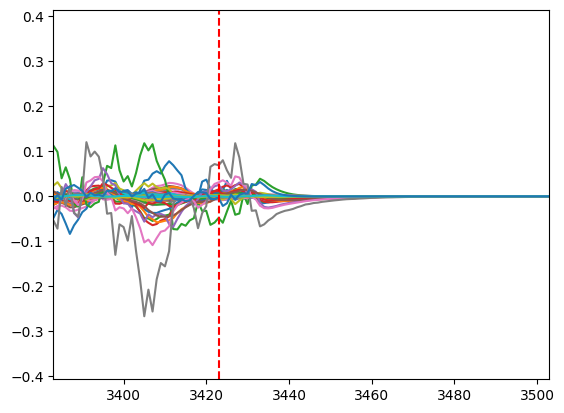

In [129]:
window_size = 40
plt.plot(original - shifted)
plt.xlim(convergence_point-window_size, convergence_point+window_size+40)
# put a vertical line at the point of shift
plt.axvline(x=convergence_point, color='r', linestyle='--')

In [68]:
dynamical_regimes

{'stable': [0.2], 'critical': [1.0], 'chaotic': [1.8]}

/tmp/ipykernel_907929/2485042550.py:18: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(order)
/tmp/ipykernel_907929/2485042550.py:18: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(order)
/tmp/ipykernel_907929/2485042550.py:18: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(order)


Text(0.5, 0.98, 'Convergence Time Constants per Subnetwork by Dynamical Regime')

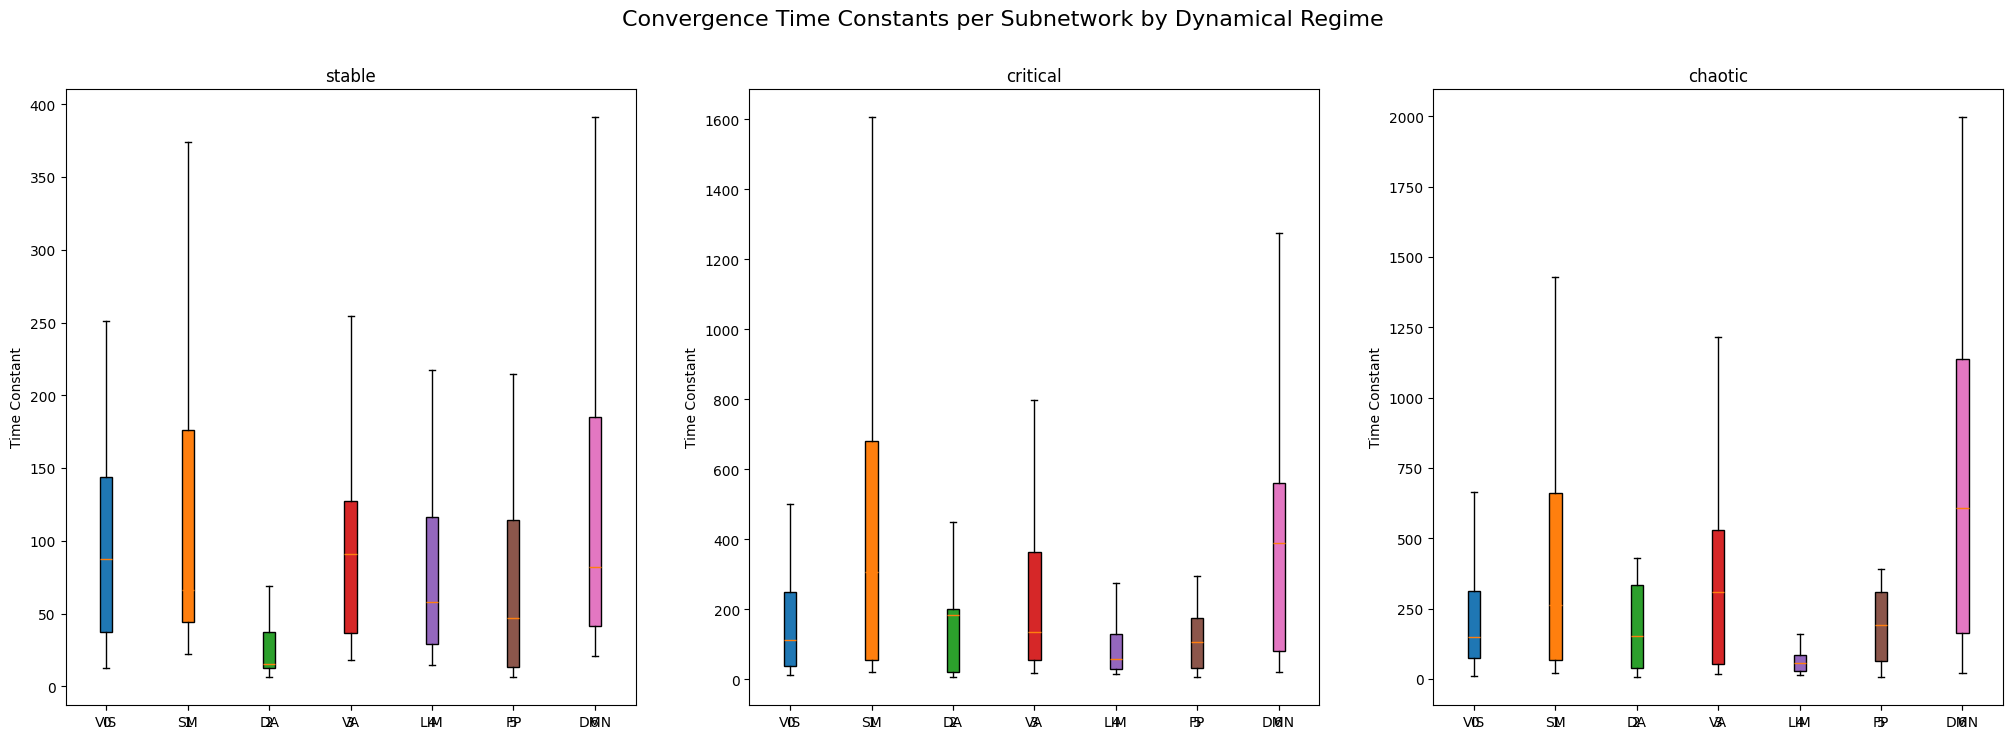

In [87]:
# now we have the time constants for each RSN and alpha value
dynamical_regimes = {'stable': [alphas[0]], 'critical': [alphas[4]], 'chaotic': [alphas[8]]}
# dynamical_regimes = {'stable': alphas[0:3], 'critical': alphas[3:6], 'chaotic': alphas[6:9]}

order = ["VIS","SM","DA","VA","LIM","FP","DMN"] # use order from the paper

# now we can create boxplots for each RSN in a single plot, with three subplots for each dynamical regime
# make a different color for each network

import matplotlib.pyplot as plt

fig, axs = plt.subplots(1, 3, figsize=(25, 8))

for i, regime in enumerate(dynamical_regimes):
    ax = axs[i]
    ax.set_title(regime)
    ax.set_ylabel('Time Constant')
    ax.set_xticklabels(order)
    ax.set_xticks(range(7))
    for j, network in enumerate(order):
        data = [timeconstants[network][alpha] for alpha in dynamical_regimes[regime]]
        # average the time constants across alpha values for each network
        if len(data) > 1:
            data = [np.mean(data, axis=0)]
        ax.boxplot(data, positions=[j], showfliers=False, patch_artist=True, boxprops=dict(facecolor='C'+str(j)))
fig.suptitle('Convergence Time Constants per Subnetwork by Dynamical Regime', fontsize=16)



In [77]:
timeconstants

{'DA': {0.2: array([ 2.,  2.,  1.,  3.,  1.,  8.,  1.,  3.,  2.,  3.,  1.,  7.,  1.,
          6.,  3.,  4., 25.,  2.,  2.,  2.,  2.,  2.,  1.,  2.,  7., 27.,
         14., 15.,  2.,  2.,  5.,  5.,  6.,  6., 14., 14.,  1.,  2.,  2.,
         44.,  2.,  2.,  2.,  3.,  1.,  2.,  5.,  2.,  3.,  3.,  2.,  2.,
          1.,  3.,  6.,  3., 11., 11.]),
  0.4: array([ 3.,  2.,  2.,  3.,  1., 44., 19.,  3.,  2.,  3.,  1., 43.,  2.,
         10.,  3.,  4., 25.,  2.,  2.,  2.,  2.,  2.,  1., 14.,  8., 19.,
         14., 20.,  2.,  2., 23.,  5., 43.,  6., 37., 14.,  1.,  2.,  2.,
         22.,  2.,  3.,  3.,  4., 40., 38.,  4.,  3.,  3.,  3.,  2.,  2.,
          2.,  3., 37.,  3., 11., 11.]),
  0.6000000000000001: array([ 3.,  3.,  2.,  4., 19., 19., 20.,  3.,  2.,  3., 19., 19.,  2.,
         13.,  3.,  4., 15.,  2.,  2.,  2.,  2.,  2.,  1., 14., 13., 15.,
         14., 23.,  2.,  2., 41.,  5.,  6.,  6., 26., 14.,  1.,  3.,  3.,
         18.,  2.,  3.,  3.,  4., 17., 17.,  4.,  4.,  4.,  5.,  3.,

Text(0.5, 0.98, 'Pairwise Differences in Time Constants Per Subnetwork by Dynamical Regime')

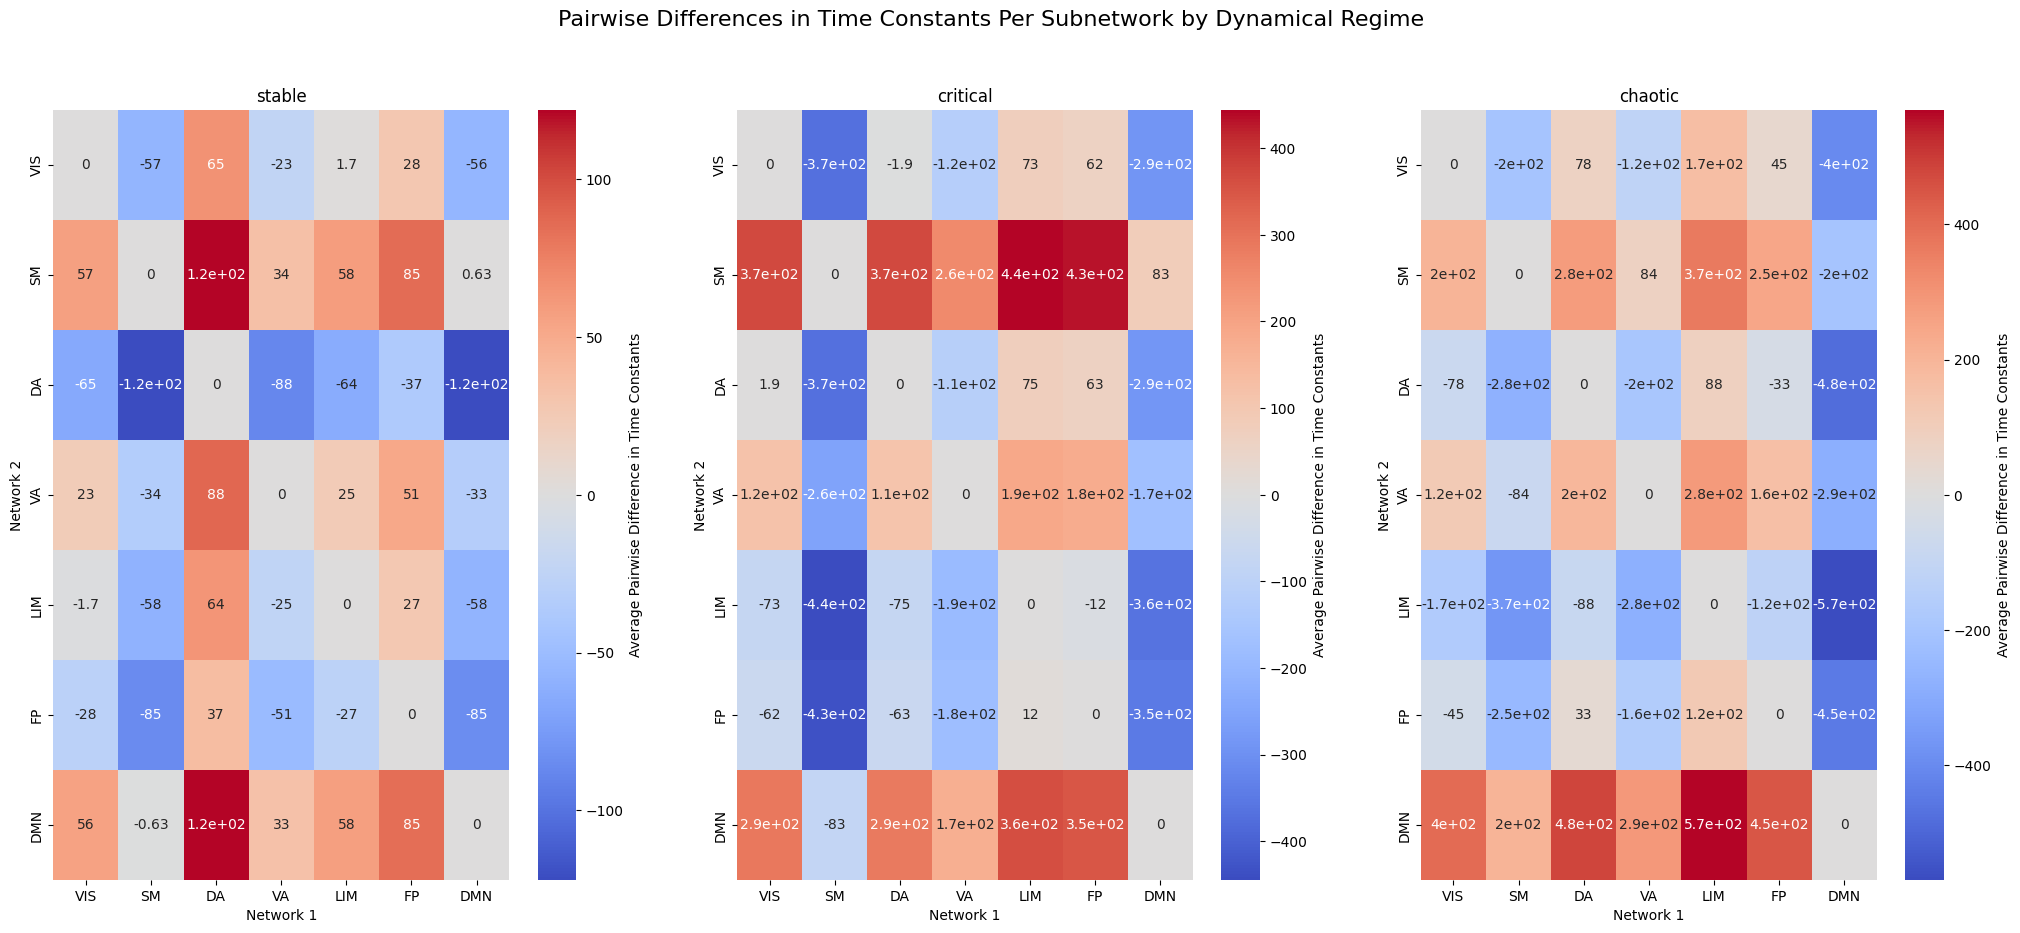

In [88]:
# Now look at pairwise distances between time constants for each network

diffs = {}
for regime in dynamical_regimes:
    diffs[regime] = {}
    for network1 in timeconstants:
        for network2 in timeconstants:
            # diffs[regime][(network1,network2)] 
            #print(timeconstants[network1][dynamical_regimes[regime][0]])
            avg_timeconstant1 = np.mean(timeconstants[network1][dynamical_regimes[regime][0]], axis=0)
            avg_timeconstant2 = np.mean(timeconstants[network2][dynamical_regimes[regime][0]], axis=0) 
            # this should give us the average time constant across all alpha values for each network in the regime
            diffs[regime][(network1,network2)] = avg_timeconstant1 - avg_timeconstant2


# now we should have a pairwise difference between networks of the absolute difference in node-wise time constants for each regime

# now we can plot them as a heatmap for each regime in subplots
import seaborn as sns
import pandas as pd

fig, axs = plt.subplots(1, 3, figsize=(25, 10))
diffs_dfs = {regime: pd.DataFrame(index=order, columns=order) for regime in dynamical_regimes}

for i,regime in enumerate(dynamical_regimes):

    diffs_df = diffs_dfs[regime]
    
    for network1 in order:
        for network2 in order:
            diffs_df.loc[network1,network2] = diffs[regime][(network1,network2)]

    # plot the dataframe as a heatmap
    ax = axs[i]
    # sns.heatmap(diffs_df.astype(float), cmap='coolwarm', cbar_kws={'label': 'Average Pairwise Difference in Time Constants'})
    sns.heatmap(diffs_df.astype(float), cmap='coolwarm', annot=True, cbar_kws={'label': 'Average Pairwise Difference in Time Constants'}, ax=ax)
    ax.set_xlabel('Network 1')
    ax.set_ylabel('Network 2')
    ax.set_title(regime)

fig.suptitle('Pairwise Differences in Time Constants Per Subnetwork by Dynamical Regime', fontsize=16)

/tmp/ipykernel_907929/1945258752.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=diffs_df['mean'], y=diffs_df.index, palette='coolwarm', ax=ax)
/tmp/ipykernel_907929/1945258752.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=diffs_df['mean'], y=diffs_df.index, palette='coolwarm', ax=ax)
/tmp/ipykernel_907929/1945258752.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=diffs_df['mean'], y=diffs_df.index, palette='coolwarm', ax=ax)


Text(0.5, 0.98, 'Average Pairwise Differences in Time Constants Per Subnetwork by Dynamical Regime')

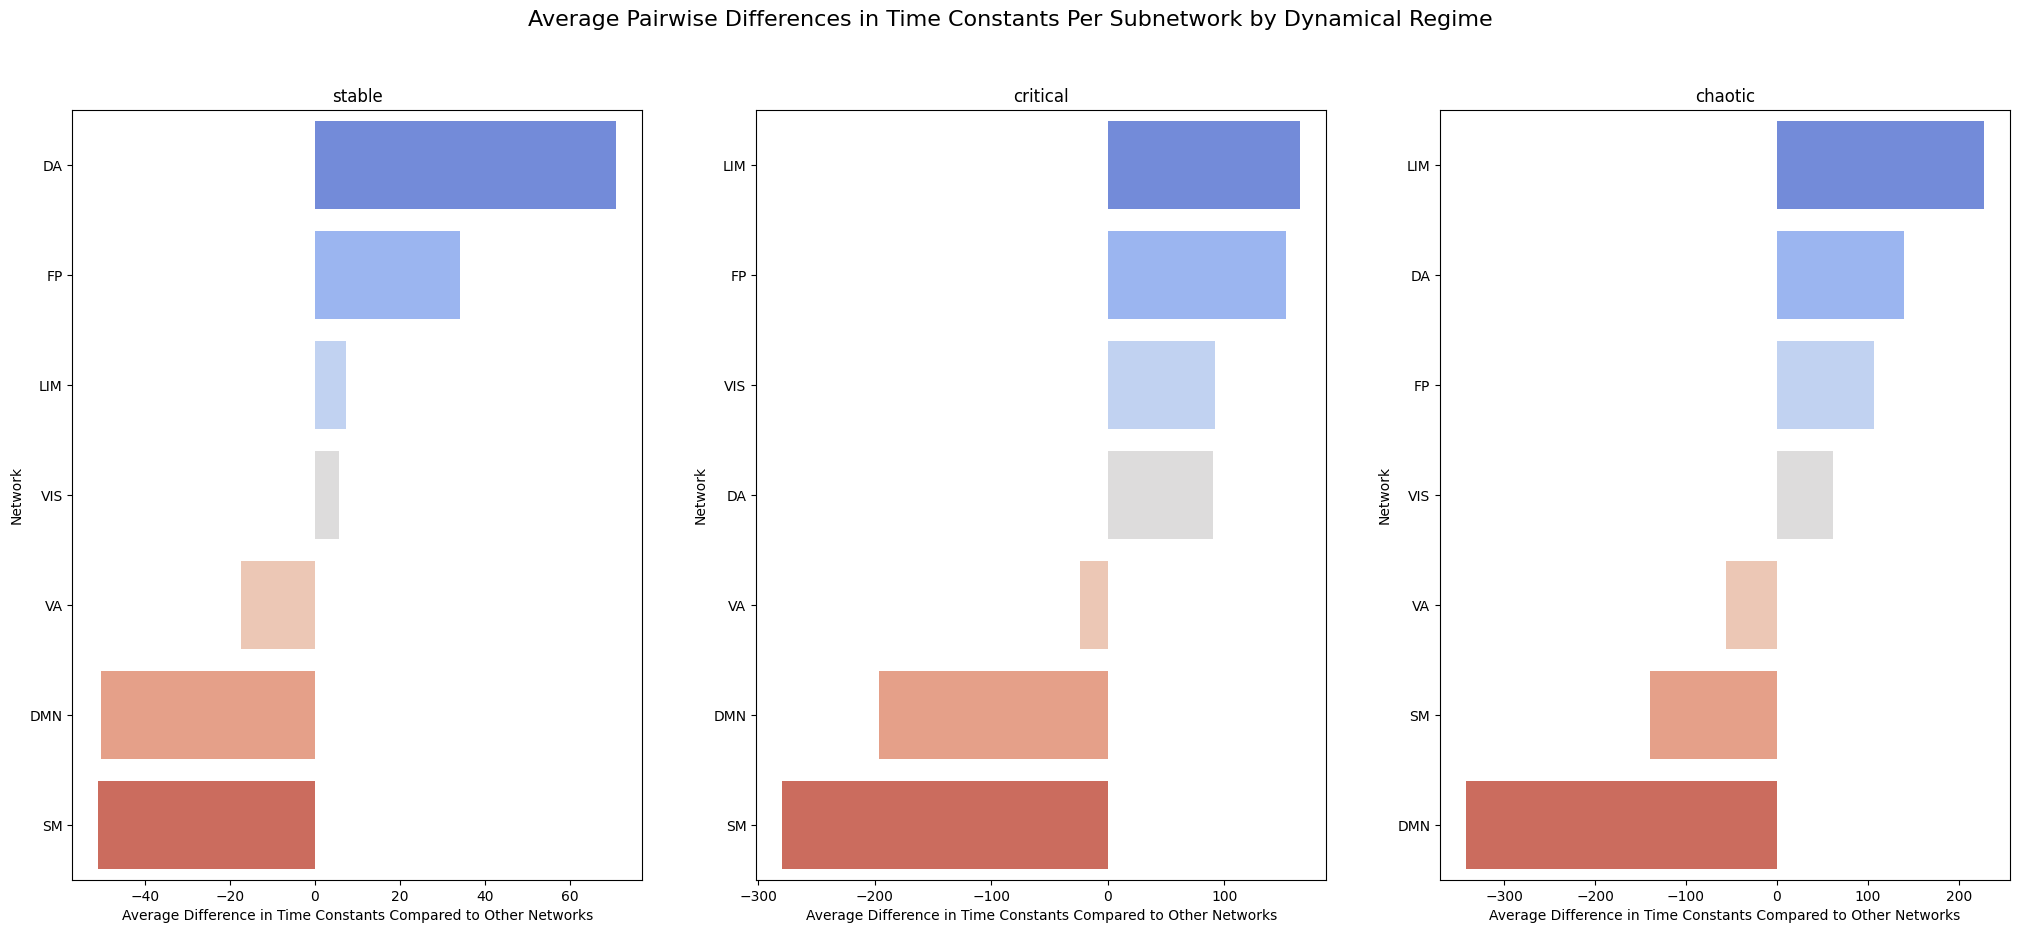

In [89]:
fig, axs = plt.subplots(1, 3, figsize=(25, 10))



for i,regime in enumerate(dynamical_regimes):
    diffs_df = diffs_dfs[regime]
    diffs_df['mean'] = diffs_df.mean(axis=0, skipna=True)
    diffs_df = diffs_df.sort_values('mean', ascending=False)
    # create a standard deviation column
    #diffs_df['std'] = diffs_df.std(axis=0)
    # bar plot
    ax = axs[i]
    sns.barplot(x=diffs_df['mean'], y=diffs_df.index, palette='coolwarm', ax=ax)

    ax.set_xlabel('Average Difference in Time Constants Compared to Other Networks')
    ax.set_ylabel('Network')
    ax.set_title(regime)

fig.suptitle('Average Pairwise Differences in Time Constants Per Subnetwork by Dynamical Regime', fontsize=16)